In [753]:
import numpy as np
import matplotlib.pyplot as plt

In [754]:
# modelling the arrival process
# per second converyor belt
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 

In [755]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return int(N)

Text(0.5, 0, 'Number of parts delivered')

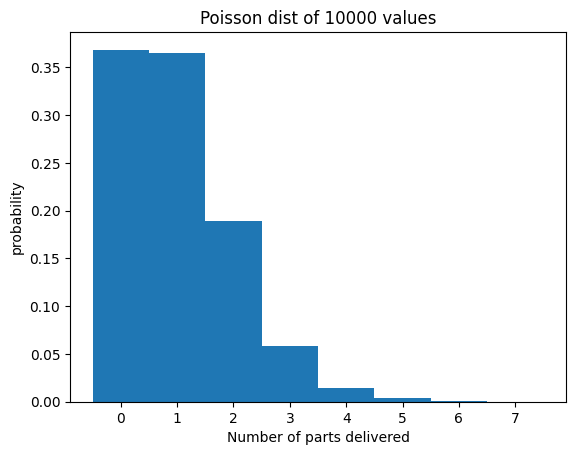

In [770]:
# total number of entities conveyor1 delivers per second for 10000 seconds
c1sample=[poisson_est(1)  for i in range(10000)]
c1sample=np.array(c1sample).astype(int)
weights = np.ones_like(c1sample) / len(c1sample)
plt.hist(c1sample,weights=weights,bins = np.arange( min( c1sample ) - 0.5 , max( c1sample ) + 1.5 , 1.0 ))
plt.title("Poisson dist of 10000 values")
plt.ylabel('probability')
plt.xlabel('Number of parts delivered')

In [757]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

9998

In [758]:
def fail_inverse():
    # this gives the times between events
    return (-1/0.01)*np.log(1-np.random.random())

In [759]:
f=[fail_inverse() for i in range(10000)]
f=np.array(f).astype(int)
# f=np.cumsum(f)
# f=f[f<=10000]


(array([5.584e+03, 2.410e+03, 1.103e+03, 5.050e+02, 2.380e+02, 9.900e+01,
        3.100e+01, 2.000e+01, 4.000e+00, 6.000e+00]),
 array([  0. ,  80.9, 161.8, 242.7, 323.6, 404.5, 485.4, 566.3, 647.2,
        728.1, 809. ]),
 <BarContainer object of 10 artists>)

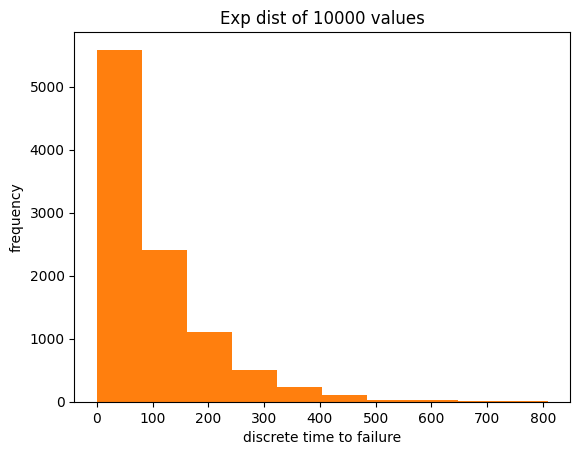

In [760]:
plt.hist(f)
plt.title("Exp dist of 10000 values")
plt.ylabel('frequency')
plt.xlabel("discrete time to failure")
plt.hist(f)

In [761]:
# for each second, check the 
def simulate(len_time):
    C1event=[]
    stationFailures=[]
    completed=0
    downtime=0
    # stacks to count waiting entities at each conveyour belt C
    waitC1=0
    waitC2=0

# simulate events with respect to random variables
    for t in np.arange(len_time):
        C1event.append(poisson_est(1))
        stationFailures.append((-1/0.01)*np.log(1-np.random.random()))
    stationFailures=np.cumsum(np.array(stationFailures).astype(int)) 
    # stationFailures=[1]
    # simulate machine working
    # for time_index in timesteps:
    time_index=1
    while time_index<len_time:
        # update parts waiting
        
        waitC1=C1event[time_index-1]+waitC1
        if ((time_index)%1.5==0 or (time_index-0.5)%1.5==0):
            waitC2+=1

        # if it is time for failure
        if time_index in stationFailures:
            for i in range(1,6):
                if time_index==len_time:
                    return completed
                time_index+=1
            downtime+=5

            # if both parts are ready
            if waitC1>0 and waitC2>0:
                waitC1-=1
                waitC2-=1
                completed+=1
        else: #if there is no failure
            if waitC1>0 and waitC2>0: #if both parts are ready
                waitC1-=1
                waitC2-=1
                completed+=1           
            time_index+=1
    return completed

In [762]:
simulate(10000)

6393

In [763]:
monteResult=[simulate(10000) for i in range(100)]

Text(0, 0.5, 'frequency')

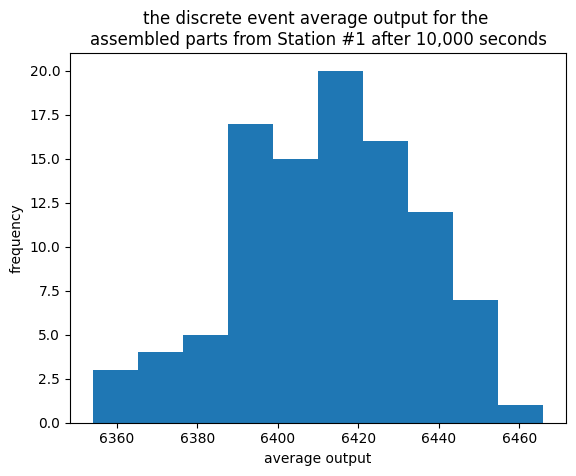

In [767]:
plt.hist(monteResult)
plt.title('the discrete event average output for the \nassembled parts from Station #1 after 10,000 seconds')
plt.xlabel("average output")
plt.ylabel("frequency")

In [769]:
monteResult=np.array(monteResult)
average_output=int(monteResult.mean())
1/(average_output/10000)

1.5595757953836558

In [766]:
# Questions that will affect the final result:

# will station1 do all work available instantly or one per unit time, while loop or one per iteration
# can parts + downtime> total time
# end behavior, produce or no
# consecutive failures add accumulate downtime?